In [1]:
import pylhe
# import rootnotes
import ROOT 
import math

Welcome to JupyROOT 6.20/04


In [2]:

def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu)+getattr(p2,mu))**2 for mu in ['e','px','py','pz']))
def transvers_mass(p1):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu))**2 for mu in ['e','pz']))


In [3]:
process = 'sig_schannel' 
m = []
mT = []
for e in pylhe.readLHE('./'+process+'/Events/run_01/unweighted_events.lhe'):
    m.append(invariant_mass(e.particles[-1],e.particles[-2]))
    mT.append(transvers_mass(e.particles[-3]))
    
#     h.Fill(invariant_mass(e.particles[-1],e.particles[-2]),e.eventinfo.weight)

In [4]:
# process = 'pp_xdxd_lightj_1'
# process = 'pp_ee'
process = 'sig_schannel' 

LHE = pylhe.readLHE('./'+process+'/Events/run_01/unweighted_events.lhe')

In [5]:
a = [i for i in LHE ] ##store all event in LHE file
# [i for i in a]

In [6]:
len(a) #check number of event

10000

In [7]:
dir(a[0]) #to understand the variables in event

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'attributes',
 'eventinfo',
 'particles',
 'weights']

In [8]:
dir(a[0].particles[-1]) # check variables stored in particle

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

In [37]:
[i for i in a[0].particles]

In [10]:
[i.status for i in a[0].particles] #particle status for first event (Parton level)

[-1.0, -1.0, 2.0, 1.0, 1.0]

In [39]:
[i.id for i in a[0].particles] #particle id for first event (Parton level)

[2.0, -2.0, 5000001.0, 4900101.0, -4900101.0]

In [ ]:
## If you don't know the meaning of the numbers please open para_card.dat in '.../sig_schannel/Cards/'
# or you can read: http://home.thep.lu.se/~torbjorn/pythia81html/ParticleData.html

In [33]:
[i.mother1 for i in a[0].particles] #particle mother1 for first event (Parton level)

[0.0, 0.0, 1.0, 3.0, 3.0]

In [34]:
[i.mother2 for i in a[0].particles] #particle mother1 for first event (Parton level)

[0.0, 0.0, 2.0, 3.0, 3.0]

In [12]:
import matplotlib.pyplot as plt 

In [13]:
import numpy as np

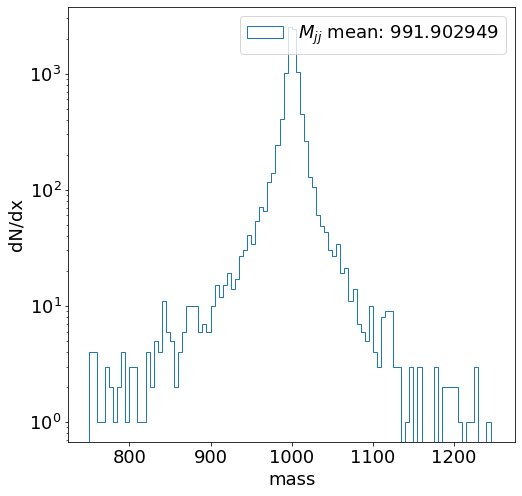

In [14]:

bins = 100
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(8,8)) # plotsize
x1, x2 = 750, 1250 
plt.hist(m ,bins=bins, histtype='step',  range=[x1, x2], label='${M_{jj}}$ mean: %f' %np.average(m))
# plt.hist(mT ,bins=bins, histtype='step',  range=[x1, x2], label='${M_{T}}$ mean: %f' %np.average(mT))

plt.legend(prop={'size': tagsize}) # plot label tag
plt.yscale('log') 
plt.xlabel('mass' , fontsize=fs)  # plot x-axis label
plt.ylabel("dN/dx", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size 
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

In [ ]:
##==================================================back up=====================================================================

In [1]:
from root_numpy import root2array, stretch
from pyjet import cluster
from pyjet.testdata import get_event
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import glob
import matplotlib.cm as cm
from scipy.stats import binned_statistic_2d
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.20/04


ModuleNotFoundError: No module named 'pyjet'

In [ ]:
def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu)+getattr(p2,mu))**2 for mu in ['e','px','py','pz']))

In [1]:
'''
    Eventually, this needs to replace process_jet.py
'''


def struc2arr(x):
    # pyjet outputs a structured array. This converts
    # the 4 component structured array into a simple
    # 4xN numpy array
    x = x.view((float, len(x.dtype.names)))
    return x


def rotate(x, y, a):
    xp = x * np.cos(a) - y * np.sin(a)
    yp = x * np.sin(a) + y * np.cos(a)
    return xp, yp


def jet_trimmer(event, R0, R1, pt_cut):
    # R0 = Clustering radius for the main jets
    # R1 = Clustering radius for the subjets in the primary jet
    # pt_cut = Threshold for subjets (relative to the primary jet it's a subjet of)

    trim_pt, trim_eta, trim_phi, trim_mass = [], [], [], []
    flattened_event = stretch(event.reshape(-1))
    sequence = cluster(flattened_event, R=R0, p=-1)

    # Main jets
    jets = sequence.inclusive_jets(ptmin=3)

    # In case we are missing a leading jet, break early
    if len(jets) == 0:
        return np.zeros(1), np.zeros(1), np.zeros(1), np.zeros(1)

    # Take just the leading jet
    jet0 = jets[0]

    # Define a cut threshold that the subjets have to meet (i.e. 5% of the original jet pT)
    jet0_max = jet0.pt
    jet0_cut = jet0_max*pt_cut

    # Grab the subjets by clustering with R1
    subjets = cluster(jet0.constituents_array(), R=R1, p=1)
    subjet_array = subjets.inclusive_jets()

    # Require at least 2 subjets. Otherwise, break early
    if len(subjet_array) <= 1:
        return np.zeros(1), np.zeros(1), np.zeros(1), np.zeros(1)

    for subjet in subjet_array:
        if subjet.pt < jet0_cut:
            # subjet doesn't meet the percentage cut on the original jet pT
            pass
        else:
            # Get the subjets pt, eta, phi constituents
            subjet_data = subjet.constituents_array()
            subjet_data = struc2arr(subjet_data)
            pT = subjet_data[:, 0]
            eta = subjet_data[:, 1]
            phi = subjet_data[:, 2]
            mass = subjet_data[:, 3]

            # Shift all data such that the leading subjet
            # is located at (eta,phi) = (0,0)
            eta -= subjet_array[0].eta
            phi -= subjet_array[0].phi

            # Rotate the jet image such that the second leading
            # jet is located at -pi/2
            s1x, s1y = subjet_array[1].eta, subjet_array[1].phi
            theta = np.arctan2(s1y, s1x)
            if theta < 0.0:
                theta += 2 * np.pi
            eta, phi = rotate(eta, phi, np.pi - theta)

            # Collect the trimmed subjet constituents
            trim_pt.append(pT)
            trim_eta.append(eta)
            trim_phi.append(phi)
            trim_mass.append(mass)
    return np.concatenate(trim_pt), np.concatenate(trim_eta), np.concatenate(trim_phi), np.concatenate(trim_mass)


def pixelize(event):
    pt, eta, phi = event[0], event[1], event[2]

    # Define the binning for the complete calorimeter
    bins = np.arange(-1.6, 1.6, 0.1)

    # Sum energy deposits in each bin
    digitized = binned_statistic_2d(eta, phi, pt, statistic="sum", bins=bins)
    jet_image = digitized.statistic
    return jet_image


def root_2_jets(root_file):
    # Takes root_file as produces a jet-image
    events = root2array(root_file, "Delphes;1", branches=[
        "Tower.ET", "Tower.Eta", "Tower.Phi", "Tower.E"])

    jet_images = []
    for ix, event in enumerate(tqdm(events)):
        # create trimmed jet event (also centered and rotated)
        event = jet_trimmer(event=event, R0=1.0, R1=0.3, pt_cut=0.05)

        # pixelize the trimmed jet
        jet_image = pixelize(event)

        # include jet-image as long as it isn't blank
        # blank jets occur only if the event fails a cut
        # during trimming
        if np.sum(jet_image) != 0:
            jet_images.append(jet_image)
    return jet_images

ImportError: dynamic module does not define module export function (PyInit_libPyROOT)

In [12]:
import threading as thd
import time

def fn():
    print(time.time())
    thd.Timer(180,fn).start()
    
fn()

1594180019.5564184
1594180199.5571072
1594180379.5587177
1594180559.560401
1594180739.5621405
1594180919.5637414
1594181099.5653546
1594181279.5670657
1594181459.5688124
1594181639.5704389
1594181819.5721414
1594181999.5737936
1594182179.5755303
1594182359.5771499
1594182539.5787451
